![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Presentado por:

- Daniela del Pilar Uscategui Bernal

- Andres Camilo Alfonso Garcia

- Jose Fernando Duarte Alvarado

- Juan Sebastian Ramirez Garcia


# Taller: Tokenización de textos  

En este taller podrán poner en práctica sus conocimientos sobre preprocesamiento de texto (tokenización). El taller está constituido por 5 puntos, en los cuales deberan seguir las instrucciones de cada numeral para su desarrollo.

## Datos de detección de toxicidad en comentarios

En este taller se usará el conjunto de datos de detección de toxicidad en comentarios de la base de datos de Kaggle. Cada observación es un comentario que tiene como variable objetivo (target) la probabilidad de ser un comentario tóxico. El objetivo es predecir la toxicidad de cada comentario. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/c/jigsaw-unintended-bias-in-toxicity-classification/data).

In [1]:
# SUGERIDO: Descomenta la siguiente linea de código si requieres instalar las libreías básicas utilizadas en este notebook
# Si requieres incluir más librerías puedes agregarlas al archivo Semana 4\requirements.txt
# !pip install -r requirements.txt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Importación librerías
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import metrics
%matplotlib inline

In [4]:
# Carga de datos de archivos .csv
df = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2025/main/datasets/Toxicity.zip')
df = df[['id','comment_text', 'target']]
df.head()

,id,comment_text,target
0,6101457,What are you talking about? What group do Pete...,0.0
1,5342103,"NO!, Let him, we need a Conservative government.",0.0
2,743361,"Perhaps he took the ""power out of the Cardinal...",0.2
3,551008,"As always, yours is dripping with sarcasm, whi...",0.0
4,865998,The dirty little secret is that the price rang...,0.3


In [5]:
df.shape

(541462, 3)

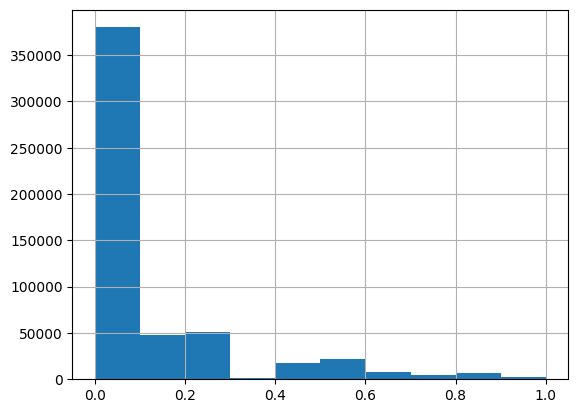

In [6]:
# Impresión histograma de variable de interés (y)
import matplotlib.pyplot as plt
df.target.hist()
plt.show()

In [7]:
# Separación de variable de interés (y)
y = df.target
y.describe()

count    541462.000000
mean          0.102991
std           0.196979
min           0.000000
25%           0.000000
50%           0.000000
75%           0.166667
max           1.000000
Name: target, dtype: float64

In [8]:
# Separación de variables predictoras (X), solo se considera el texto de la noticia
X = df.comment_text

In [9]:
# Separación de datos en set de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Punto 1 - Tokenización con CountVectorizer

En la celda 1 creen y entrenen el modelo de regresión de su preferencia, para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer** para preprocesar los comentarios y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [10]:
# Celda 1
# Procedemos a crear matrices de tokens para bigramas utilizando CountVectorizer y a partir de X_train 

vect = CountVectorizer(
    max_features=150000,                  #Reduzco cantidad de tokens a los N mas usados para mantener el codigo computacionalmente viable
    lowercase=False,                      #No remuevo mayusculas para considerar posible uso de captions en mensajes toxicos
    ngram_range=(2, 2),                   # Elijo bigramas como ejercicio inicial para incluir contexto en las palabras analizadas
    min_df=3,                             # Ignoro expresiones que se usen muy poco (menos de 3 ocurrencias)
    max_df=0.95,                          # Ignoro expresiones que se usen mucho (que aparecen en mas del 95% de los comentarios)
    stop_words='english'                  # Remuevo stop words en ingles para facilitar computation y remover ruido
)

X_dtm_train = vect.fit_transform(X_train)
X_dtm_train.shape

(362779, 150000)

In [11]:
# de una vez aplicamos los mismos cambios en X_test
X_dtm_test = vect.transform(X_test)
X_dtm_test.shape

(178683, 150000)

In [12]:
vect.vocabulary_

{'history say': np.int64(79623),
 'Native children': np.int64(20382),
 'knowledge government': np.int64(87590),
 'say happened': np.int64(122943),
 'say didn': np.int64(122891),
 'human health': np.int64(80804),
 'widely used': np.int64(145494),
 'effects health': np.int64(65156),
 'scientifically proven': np.int64(123732),
 'The author': np.int64(28885),
 'marijuana use': np.int64(96661),
 'surely better': np.int64(132175),
 'In cases': np.int64(14916),
 'young adult': np.int64(149834),
 'need ban': np.int64(101336),
 'marijuana sales': np.int64(96654),
 'sales use': np.int64(122568),
 'use marijuana': np.int64(140598),
 'marijuana cause': np.int64(96641),
 'cause problems': np.int64(48754),
 'The women': np.int64(30514),
 'south africa': np.int64(127919),
 'years ago': np.int64(149382),
 'ago did': np.int64(40312),
 'did agree': np.int64(60097),
 'And ll': np.int64(4185),
 'll coming': np.int64(92995),
 'You left': np.int64(38140),
 'left It': np.int64(89194),
 'It great': np.int64(1

In [13]:
# Obvervamos algunos de los tokens generados
print(vect.get_feature_names_out()[-150:-100])

['young girl' 'young girls' 'young guy' 'young guys' 'young healthy'
 'young inexperienced' 'young kid' 'young kids' 'young know'
 'young ladies' 'young lady' 'young life' 'young male' 'young males'
 'young man' 'young men' 'young minds' 'young offenders' 'young old'
 'young ones' 'young people' 'young person' 'young pitchers'
 'young players' 'young priest' 'young priests' 'young professionals'
 'young remember' 'young single' 'young son' 'young students'
 'young talent' 'young team' 'young teens' 'young understand' 'young uns'
 'young victims' 'young voters' 'young white' 'young woman' 'young women'
 'young workers' 'younger brother' 'younger days' 'younger folks'
 'younger generation' 'younger generations' 'younger kids' 'younger ones'
 'younger people']


In [14]:
#Procedemos a entrenar un modelo de ridge con alfa 1 para predecir la probabilidad de que un comentario sea toxico basado en el texto del mismo
# Se elige Ridge debido a su bajo consumo computacional y relativamente buen desempeño con modelos de alta dimensionalidad
from sklearn.linear_model import Ridge  
ridge = Ridge(alpha=1.0)

scores = cross_val_score(ridge, X_dtm_train, y_train, cv=10, scoring='neg_mean_squared_error')
mse_scores = -scores
pd.Series(mse_scores).describe()

count    10.000000
mean      0.048059
std       0.000537
min       0.047272
25%       0.047758
50%       0.047984
75%       0.048176
max       0.049101
dtype: float64

In [15]:
#Ahora probamos modelo en set de test
from sklearn.metrics import mean_squared_error

ridge.fit(X_dtm_train, y_train)
y_pred = ridge.predict(X_dtm_test)


In [16]:
#Cálculo del MSE del modelo
mse_test2 = mean_squared_error(y_test, y_pred)

print(f"MSE: {mse_test2:.4f}")


MSE: 0.0453


## Procedimiento
---
A continuación, se describen los pasos realizados para vectorizar los textos utilizando bigramas y entrenar un modelo predictivo:

1. **Creación del vectorizador:**
   - Se utiliza `CountVectorizer` de `sklearn` configurado con los siguientes parámetros:
     - `ngram_range=(2, 2)`: se generan **bigramas**.
     - `max_features=150000`: se seleccionan los 150,000 bigramas más frecuentes.
     - `lowercase=False`: se conserva el uso de mayúsculas (útil para analizar posibles signos de toxicidad).
     - `min_df=3`: se ignoran bigramas que aparecen en menos de 3 documentos.
     - `max_df=0.95`: se eliminan bigramas que aparecen en más del 95% de los documentos.
     - `stop_words='english'`: se eliminan stopwords (“the” “is” “in” “for” “where” “when” “to” “at”) en inglés.

2. **Aplicación del vectorizador:**
   - Se entrena el vectorizador con el conjunto `X_train` mediante `fit_transform`.
   - Se aplica el mismo vectorizador al conjunto `X_test` usando `transform`.

3. **Exploración de resultados:**
   - Se inspeccionan algunos de los tokens generados con `get_feature_names_out()` para entender los bigramas seleccionados.

4. **Entrenamiento del modelo Ridge:**
   - Se entrena un modelo de regresión lineal con regularización L2 (`Ridge`) usando `alpha=1.0`.
   - Se evalúa el rendimiento con validación cruzada de 10 pliegues utilizando el error cuadrático medio negativo (`neg_mean_squared_error`).

5. **Evaluación del modelo en test:**
   - Se ajusta el modelo con los datos de entrenamiento (`fit`).
   - Se hacen predicciones sobre `X_test`.
   - Se calcula el **MSE (Mean Squared Error)** final para evaluar el desempeño en datos no vistos.

## Análisis

Para el proceso de tokenización, se seleccionaron los **150,000 bigramas más frecuentes (pares de palabras consecutivas)** con el fin de reducir el coste computacional que implicaría utilizar todo el vocabulario del conjunto de datos. Además, se mantuvo la distinción entre mayúsculas y minúsculas (lowercase=False), puesto que el **uso de mayúsculas suele reflejar énfasis o “gritos”** que pueden asociarse a un **mayor grado de "toxicidad"** en los comentarios.

Empleando validación cruzada con 10 particiones (folds), el modelo Ridge alcanzó un **error cuadrático medio (MSE) promedio de 0.048**, con una desviación estándar extremadamente baja (0.00048). Este resultado indica una gran consistencia en el rendimiento entre particiones. Al evaluar el modelo final **sobre el conjunto de prueba se obtuvo un MSE de 0.0454**, similar al registrado con el dataset de entrenamiento, lo que confirma que el modelo captura parte de la relación entre los bigramas y la etiqueta de “toxicidad” pero con un margen de error (RMSE) relativamente elevado de 21%.

---


## Punto 2 - Tokenización con CountVectorizer y trigramas

En la celda 2 creen y entrenen el mismo modelo de regresión del punto anterior (es decir si usaron un RandomForestRegresor usen nuevamente ese regresor), para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer **considerando trigramas** para preprocesar los comentarios y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [17]:
# Celda 2
# Procedemos a crear matrices de tokens para trigramas utilizando CountVectorizer a partir de X_train 

vect3 = CountVectorizer(
    max_features=150000,                  #Reduzco cantidad de tokens a los N mas usados para mantener el codigo computacionalmente viable
    lowercase=False,                      #No remuevo mayusculas para considerar posible uso de captions en mensajes toxicos
    ngram_range=(3, 3),                   # Elijo TRIGRAMAS para incluir contexto en las palabras analizadas
    min_df=3,                             # Ignoro expresiones que se usen muy poco (menos de 3 ocurrencias)
    max_df=0.95,                          # Ignoro expresiones que se usen mucho (que aparecen en mas del 95% de los comentarios)
    stop_words='english'                  # Remuevo stop words en ingles para facilitar computation y remover ruido
)

X_dtm_train3 = vect3.fit_transform(X_train)
X_dtm_train3.shape

(362779, 78966)

In [18]:
# aplicamos los mismos cambios en X_test
X_dtm_test3 = vect3.transform(X_test)
X_dtm_test3.shape

(178683, 78966)

In [19]:
vect3.vocabulary_

{'harmful human health': np.int64(45302),
 'years ago did': np.int64(78591),
 'poor don pay': np.int64(61981),
 'don pay taxes': np.int64(38939),
 'shoot multiple rounds': np.int64(68098),
 'chose Donald Trump': np.int64(32893),
 'Donald Trump That': np.int64(6739),
 'That sort thing': np.int64(19251),
 'sort thing happens': np.int64(68976),
 'Are going join': np.int64(3616),
 'attempting defend indefensible': np.int64(29623),
 'white monopoly capital': np.int64(76452),
 'white people especially': np.int64(76478),
 'white people It': np.int64(76465),
 'The police did': np.int64(21264),
 'The right wing': np.int64(21564),
 'today press conference': np.int64(73117),
 'pass smell test': np.int64(59325),
 'got caught pants': np.int64(44278),
 'For 30 years': np.int64(7497),
 'good You know': np.int64(43913),
 'You know mean': np.int64(27232),
 'They didn say': np.int64(22361),
 'short shelf life': np.int64(68123),
 'chemical weapons use': np.int64(32742),
 'Nobody went broke': np.int64(145

In [20]:
print(vect3.get_feature_names_out()[-150:-100])

['years ve heard' 'years ve lived' 'years ve seen' 'years ve taken'
 'years ve told' 'years washout good' 'years work experience'
 'years years ago' 'years years years' 'yell crowded theatre'
 'yelling crowded theater' 'yellow brick road' 'yellow peril blacks'
 'yes Sir Routhier' 'yes We need' 'yes did say' 'yes good old'
 'yes just like' 'yes let start' 'yes men women' 'yes really thing'
 'yes yes The' 'yes yes yes' 'yield right way' 'young African American'
 'young adults stay' 'young black males' 'young black men'
 'young concert goers' 'young didn know' 'young fan Beat'
 'young healthy people' 'young lady just' 'young man He' 'young man dead'
 'young man died' 'young man doing' 'young man family' 'young man just'
 'young man killed' 'young man know' 'young man murdered'
 'young man tried' 'young men aged' 'young men today' 'young men women'
 'young middle aged' 'young ones reason' 'young people The'
 'young people attended']


In [21]:
#Procedemos a entrenar mismo modelo de ridge con alfa 1 para predecir la probabilidad de que un comentario sea toxico basado en el texto del mismo

ridge = Ridge(alpha=1.0)

scores = cross_val_score(ridge, X_dtm_train3, y_train, cv=10, scoring='neg_mean_squared_error')
mse_scores = -scores
pd.Series(mse_scores).describe()

count    10.000000
mean      0.041031
std       0.000746
min       0.039956
25%       0.040578
50%       0.040956
75%       0.041334
max       0.042581
dtype: float64

In [22]:
#Ahora probamos modelo en set de test
from sklearn.metrics import mean_squared_error

ridge.fit(X_dtm_train3, y_train)
y_pred = ridge.predict(X_dtm_test3)


In [23]:
#Cálculo MSE del modelo
mse_test3 = mean_squared_error(y_test, y_pred)

print(f"MSE: {mse_test3:.4f}")

MSE: 0.0399


### Procedimiento
---

A continuación se describen los pasos realizados para vectorizar los textos utilizando **trigramas** y entrenar un modelo predictivo:

1. **Configuración del vectorizador:**
   - Se utiliza `CountVectorizer` de `sklearn` configurado con los mismos parametros que el punto anterior pero usando trigramas (trios de palabras consecutivas) en lugar de bigramas (pares de palabras consecutivas).
     

2. **Aplicación del vectorizador:**
   - Se entrena el vectorizador con `X_train` mediante `fit_transform` para obtener la matriz de términos (`X_dtm_train3`).
   - Se aplica el mismo vectorizador al conjunto `X_test` con `transform` (`X_dtm_test3`).

3. **Entrenamiento del modelo Ridge:**
   - Se entrena un modelo de regresión lineal con regularización L2 (`Ridge`) usando `alpha=1.0`.
   - Se evalúa el modelo mediante validación cruzada de 10 pliegues utilizando la métrica `neg_mean_squared_error`.
   - Se calcula un resumen estadístico de los errores para entender la variabilidad del modelo.

4. **Evaluación del modelo en test:**
   - Se ajusta el modelo final con el conjunto de entrenamiento.
   - Se hacen predicciones sobre `X_test`.
   - Se calcula el **MSE (Mean Squared Error)** final sobre los datos de prueba (`y_test`), como métrica de desempeño.

   
## Análisis

De manera análoga al modelo con bigramas, se seleccionaron los **150,000 trigramas (secuencias de tres palabras consecutivas)** más frecuentes para limitar el coste computacional. Además, se conservó lowercase=False para mantener la distinción entre mayúsculas y minúsculas, ya que el uso de mayúsculas suele expresar énfasis o “gritos” asociados a un mayor nivel de toxicidad en los comentarios, al igual que se hizo con el modelo anterior (bigramas).

Al aplicar un modelo de regresión Ridge con validación cruzada de 10 particiones (folds), se obtuvo un **error cuadrático medio (MSE) promedio de 0.0410**, con una desviación estándar muy reducida (0.00070), lo que denota una gran estabilidad entre particiones. En la evaluación final sobre el **conjunto de prueba, el MSE fue de 0.0399**, similar al de entrenamiento. Este resultado, sensiblemente mejor que el logrado con bigramas, confirma que los trigramas capturan de forma más precisa la relación semántica con la etiqueta de “toxicidad”.

---

## Punto 3 - TfidfVectorizer

Investigen sobre la función TfidfVectorizer. En la celda de texto 3, expliquen en qué consiste esta técnica de tokenización (describanla y expliquen su funcionamiento) y cúales son las ventajas o deventajas de su uso al compararlo con la función CountVectorizer.

### Celda 3

Recordemos que CountVectorizer convierte cada pieza de texto en una colección de tokens y construye una matriz donde:
- Cada columna es una palabra (o n-grama).
- Cada fila es una pieza de text (ej. un comentario).
- Cada celda contiene el número de veces que la palabra aparece en dicho texto.


El **TF-IDF (Term Frequency-Inverse Document Frequency)** es una técnica fundamental en el procesamiento de lenguaje natural que permite transformar texto en representaciones numéricas mientras destaca las palabras más relevantes y reduce la importancia de términos comunes. TfidfVectorizer también convierte texto en una matriz numérica, pero en lugar de contar palabras, calcula un puntaje llamado TF-IDF el cual también cuenta el numero de ocurrencias de cada término pero al mismo tiempo "penaliza" aquellos términos que tienen mayores ocurrencias. Esto con el objetivo de reducir el impacto de palabras comunes que aportan poca informacíon como "the", "is", "on", "and".


**Term Frequency (TF)**

La frecuencia del término mide qué tan frecuente aparece una palabra en un documento:

$$
TF(t,d) = \frac{\text{Número de veces que aparece el término t en el documento d}}{\text{Número total de términos en el documento d}}
$$
En notación matemática:

$$
TF(t,d) = \frac{f_{t,d}}{\sum_{t' \in d} f_{t',d}}
$$

- *f(t,d)* es la frecuencia del término t en el documento d.

- El denominador es la suma de las frecuencias de todos los términos en el documento.


**Inverse Document Frequency (IDF)**

La frecuencia inversa del documento mide qué tan rara es una palabra en toda la colección de documentos:

$$
IDF(t) = \ln\left(\frac{1 + N}{1 + DF(t)}\right) + 1
$$

Donde:
- N es el número total de documentos en la colección.
- DF(t) es el número de documentos que contienen el término t.
- Se suma 1 en el numerador y denominador para evitar divisiones por cero.
- Se suma 1 al final para asegurar que términos que aparecen en todos los documentos no se anulen completamente.


**TF-IDF Score**

El puntaje TF-IDF es el producto de ambas formulaciones:

$$
TFIDF(t,d) = TF(t,d) \times IDF(t)
$$

Por lo que:

- **TF (Term Frecuency)** mide la frecuencia del término (número de veces que aparece una palabra en un documento). Donde TF(t, d) es el número de veces que el término t aparece en el documento d dividido entre la suma de todas las ocurrencias de todos los términos en el documento.

- **IDF (Inverse Document Frequency)** mide la frecuencia inversa del término (qué tan rara es esa palabra en el documento). Donde IDF(t) es uno más el logaritmo natural del cociente de uno más el numero total de documentos N dividido entre uno más el número de documentos en donde aparece el término t.
  
- Una palabra tendrá un valor alto solo si se cumplen las dos condiciones; a saber, que aparece mucho en un documento específico (TF alto) y que es rara en el resto del documento (IDF alto).


**Ventajas de utilziar TF-IDF**

- TFIDFVectorizer reduce automáticamente la importancia de términos que aparecen con mucha frecuencia en todos los documentos (conectores), que generalmente aportan poco valor semántico, dando mayor peso a palabras que son distintivas para ciertos documentos, lo que puede mejorar significativamente el rendimiento en modelos de clasificación de texto, pues,  generalmente mejora el rendimiento de algoritmos de este tipo de modelos al enfatizar características discriminativas.

- Al usar IDF, se normaliza de manera implícita la importancia de cada palabra según su distribución en todo el corpus, lo que ayuda a equilibrar documentos de diferentes longitudes, mejorando la precisión en modelos usados como sistemas de búsqueda, TF-IDF tiende a proporcionar resultados más relevantes al destacar términos distintivos.


**Desventajas de TfidfVectorizer**

- Al usar TfidfVectorizer, existe una carga computacional mayor, pues requiere más cálculos que el conteo de palabras, lo que puede ser significativo para datasets grandes. El cálculo del IDF depende de todo el corpus del documento, lo que dificulta la vectorización incremental de nuevos documentos sin recalcular los valores obtenidos.

- Los valores TF-IDF son más difíciles de interpretar directamente que los conteos de palabras. Ademas al normalizar, se puede perder información sobre la frecuencia absoluta que en algunos casos podría ser relevante.



Para determinar el uso de cada modulo, se debe tener en cuenta en cuenta lo siguiente:

- Usar CountVectorizer cuando:

    * Se necesita una representación simple e intuitiva de frecuencias.
    * Se debe realizar análisis exploratorio inicial y se requieren conteos absolutos.
    * Se trabaja con textos pequeños donde la eficiencia computacional es crucial.

- Usar TfidfVectorizer cuando:

    * Se necesita distinguir términos realmente importantes en cada corpus de los documentos.
    * Se deben usar modelos de clasificación o agrupación de textos
    * Se requiere implementar sistemas de búsqueda o recomendación
    * Se busca reducir el impacto de palabras comunes sin eliminarlas con una lista de stopwords.

La elección entre ambos modulo depende del caso de uso y se pueden probar ambos enfoques para determinar cuál ofrece mejor rendimiento para alguna aplicación particular.







## Punto 4 - Tokenización con TfidfVectorizer

En la celda 4 creen y entrenen el mismo modelo de regresión del primer punto, para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Procesen los comentarios con la función **TfidfVectorizer** y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [24]:
# Celda 4
# Procedemos a crear matrices de tokens para bigramas utilizando TfidfVectorizer y a partir de X_train 

from sklearn.feature_extraction.text import TfidfVectorizer

vecttfidf = TfidfVectorizer(
    max_features=150000,                 
    lowercase=False,                      
    ngram_range=(2, 2),                   
    min_df=3,                             
    max_df=0.95,                          
    stop_words='english'                 
)

X_tfidf_train = vecttfidf.fit_transform(X_train)
X_tfidf_train.shape

(362779, 150000)

In [25]:
# Aplicamos los mismos cambios en X_test
X_tfidf_test = vecttfidf.transform(X_test)
X_tfidf_test.shape

(178683, 150000)

In [26]:
#Procedemos a entrenar mismo modelo de ridge con alfa 1 para predecir la probabilidad de que un comentario sea toxico basado en el texto del mismo

ridge = Ridge(alpha=1.0)

scores = cross_val_score(ridge, X_tfidf_train, y_train, cv=10, scoring='neg_mean_squared_error')
mse_scores = -scores
pd.Series(mse_scores).describe()

count    10.000000
mean      0.033790
std       0.000412
min       0.032932
25%       0.033687
50%       0.033830
75%       0.034020
max       0.034291
dtype: float64

In [27]:
#Ahora probamos modelo en set de test

ridge.fit(X_tfidf_train, y_train)
y_pred = ridge.predict(X_tfidf_test)


In [28]:
#Cálculo MSE del modelo
mse_test_Tfidf2 = mean_squared_error(y_test, y_pred)

print(f"MSE: {mse_test_Tfidf2:.4f}")

MSE: 0.0346


In [29]:
# Procedemos a crear matrices de tokens para Trigramas utilizando TfidfVectorizer y a partir de X_train 

vecttfidf3 = TfidfVectorizer(
    max_features=150000,                 
    lowercase=False,                      
    ngram_range=(3, 3),                   
    min_df=3,                             
    max_df=0.95,                          
    stop_words='english'                 
)

X_tfidf_train3 = vecttfidf3.fit_transform(X_train)

# aplico los mismos cambios en X_test
X_tfidf_test3 = vecttfidf3.transform(X_test)

#Procedo a entrenar mismo modelo de ridge con alfa 1 para predecir la probabilidad de que un comentario sea toxico basado en el texto del mismo

ridge = Ridge(alpha=1.0)

scores = cross_val_score(ridge, X_tfidf_train3, y_train, cv=10, scoring='neg_mean_squared_error')
mse_scores = -scores
pd.Series(mse_scores).describe()

count    10.000000
mean      0.038773
std       0.000569
min       0.037829
25%       0.038439
50%       0.038745
75%       0.039188
max       0.039644
dtype: float64

In [30]:
#Ahora probamos modelo en set de test y calculo MSE del modelo

ridge.fit(X_tfidf_train3, y_train)
y_pred = ridge.predict(X_tfidf_test3)

mse_test_Tfidf3 = mean_squared_error(y_test, y_pred)

print(f"MSE: {mse_test_Tfidf3:.4f}")

MSE: 0.0390


## Procedimiento
---
En este punto se utiliza `TfidfVectorizer` para transformar el texto en una matriz de características ponderadas por la frecuencia de los términos inversa a la frecuencia del documento (TF-IDF). A continuación, se detallan los pasos realizados:

1. **Configuración del vectorizador:**
   - Se utiliza `TfidfVectorizer` de `sklearn` con los siguientes parámetros:
     - `ngram_range=(2, 2)`: se generan **bigramas**.
     - `max_features=150000`: se limita el número de bigramas a los más frecuentes.
     - `lowercase=False`: se conservan mayúsculas.
     - `min_df=3`: se excluyen términos poco frecuentes.
     - `max_df=0.95`: se excluyen términos demasiado comunes.
     - `stop_words='english'`: se eliminan las stopwords en inglés.

2. **Aplicación del vectorizador:**
   - Se entrena el vectorizador sobre `X_train` con `fit_transform`, obteniendo `X_tfidf_train`.
   - Se transforma `X_test` con `transform`, generando `X_tfidf_test`.

3. **Entrenamiento del modelo Ridge:**
   - Se utiliza el modelo `Ridge` con `alpha=1.0` para predecir la probabilidad de toxicidad en comentarios.
   - Se evalúa el rendimiento con validación cruzada de 10 pliegues utilizando la métrica `neg_mean_squared_error`.
   - Se calcula un resumen estadístico del error cuadrático medio (MSE).

4. **Evaluación del modelo en test:**
   - Se entrena el modelo final con los datos de entrenamiento (`X_tfidf_train`, `y_train`).
   - Se hacen predicciones sobre los datos de prueba (`X_tfidf_test`).
   - Se calcula el **MSE (Mean Squared Error)** para evaluar el desempeño del modelo en datos no vistos.

5. **Iteracion con trigramas:**
   - Se repiten los pasos 1 a 4 con trigramas en lugar de bigramas.


## Análisis

Al emplear el módulo TfidfVectorizer tanto con bigramas como con trigramas, se obtienen resultados sensiblemente mejores que con CountVectorizer, si bien el coste computacional aumenta. Esto evidencia un trade-off: elegir un modelo más rápido pero algo menos preciso, o sacrificar velocidad de entrenamiento para ganar en desempeño.

El MSE Promedio de **Bigramas 0.03383 vs el de Trigramas 0.03877**, consigue un error cuadrático medio un 12,7% inferior al de trigramas. Esto significa que, en términos de precisión global, las predicciones con bigramas están en promedio son mas cercanos a los valores reales. 

La desviación estándar del modelo con **bigramas es de 0.00041 vs el de Trigramas 0.00057**, en el caso de los bigramas es aproximadamente un 28 % menor que la de los trigramas, lo que indica que modelo con bigramas tiene un buen desempeño, siendo mas robusto los resultados varían muy poco de una partición a otra. El modelo con trigramas, al presentar mayor dispersión, podría comportarse de forma más errática con el conjunto de datos para determinar "toxicidad" en una red social, lo que dificulta garantizar un rendimiento uniforme si se hace release o deployment de este modelo.

---

## Punto 5 - Comparación y análisis de resultados

En la celda 5 comparen los resultados obtenidos de los diferentes modelos y comenten cómo el preprocesamiento de texto afecta el desempeño.

In [31]:
# Celda 5 Código para graficos y tablas comparativas
print(mse_test2)
print(mse_test3)
print(mse_test_Tfidf2)
print(mse_test_Tfidf3)


0.045325112277440856
0.03987645385787012
0.03455386748689243
0.038994934896408144


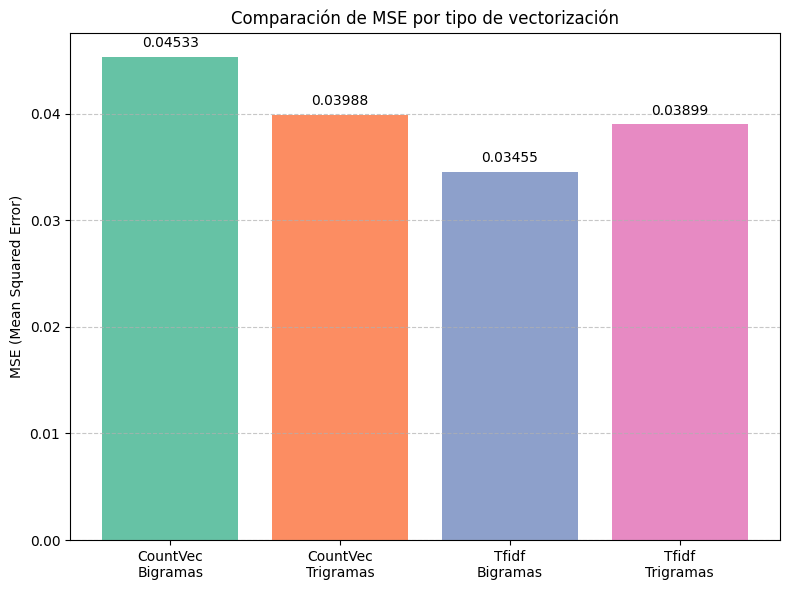

In [32]:
### Punto 5.1 - Comparación y análisis de resultados
import matplotlib.pyplot as plt
# Datos para el gráfico
labels = ['CountVec\nBigramas', 'CountVec\nTrigramas', 'Tfidf\nBigramas', 'Tfidf\nTrigramas']
mse_values = [mse_test2, mse_test3, mse_test_Tfidf2, mse_test_Tfidf3]


# Figura y ejes del plot
colors = ['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3']
fig, ax = plt.subplots(figsize=(8, 6))
bars = ax.bar(labels, mse_values, color=colors)
ax.set_ylabel("MSE (Mean Squared Error)")
ax.set_title("Comparación de MSE por tipo de vectorización")
ax.grid(axis='y', linestyle='--', alpha=0.7)
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.5f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 5),          
                textcoords='offset points',
                ha='center', va='bottom')

plt.tight_layout()
plt.show()

## Análisis
---

El modelo con mejor desempeño es aquel que presenta un menor MSE. En el caso analizado, **TF-IDF con bigramas obtuvo el valor más bajo (0.03453)**. Esto se explica porque TF-IDF otorga mayor peso a los n-gramas más frecuentes, penaliza las características raras y descarta conectores muy comunes (“the”, “is”, “on”, “and”). En cambio, **CountVectorizer con bigramas es el de peor desempeño (0.04540)**, ya que el conteo puro no diferencia la relevancia de cada n-grama en el corpus. Además, al comparar TF-IDF frente a CountVectorizer, el **MSE se reduce un 23.7 % para bigramas (de 0.0454 a 0.0345)** y un **2.2 % para trigramas (de 0.0399 a 0.03899)**.

Al examinar únicamente CountVectorizer, se obersva que los trigramas reducen el error frente a los bigramas porque capturan un contexto más amplio. Sin embargo, con TF-IDF ocurre lo opuesto, los trigramas empeoran el MSE en un 12,9 %. En este caso podría argumentarse que el aumento de dimensionalidad y el ruido que generan secuencias de texto muy específicas penalizan la capacidad de generalización del modelo.

TF-IDF introduce dos ajustes clave el Term Frequency (frecuencia local) e Inverse Document Frequency (penaliza términos excesivamente comunes), que ayudan a disminuir el ruido y a realizar patrones menos frecuentes pero más característicos del grado de "toxicidad" de la red social. En cuanto a la selección de n-gramas, los bigramas equilibran contexto y ruido al capturar la mayoría de expresiones agresivas sin fragmentar en exceso el texto. Por su parte, los trigramas amplían el contexto, pero generan muchas columnas escasamente representadas, lo que incrementa la carga computacional y añade ruido estadístico, afectando la estabilidad del modelo. Además, TF-IDF facilita el filtrado de stopwords y conectores al generar n-gramas, controla el tamaño del vocabulario y reduce el ruido. Conservar la distinción entre mayúsculas y minúsculas ayuda al modelo a detectar énfasis o “gritos” propios de comentarios tóxicos.

Por todo lo anterior y en condiciones similares (excluyendo distintas combinaciones de parámetros), TF-IDF con bigramas es la opción óptima, pues ofrece el menor MSE y un buen balance entre contexto y ruido. Si el corpus presenta un contexto muy complejo y se dispone de suficiente capacidad computacional, los trigramas pueden aportar valor,siempre que se aplique el modulo TF-IDF para mitigar su impacto negativo, pero en escenarios donde el coste computacional es crítico, conviene optar por CountVectorizer con bigramas.

---
